<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/fdtd/em_simulation_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Propagation of a sinusoidal electromagnetic wave in a lossy dielectric.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Physical parameters.
ke = 200          # The extent of the domain.
kc = ke//2        # The centre of the domain.
ks = 5            # Location of the soft source.
ex = np.zeros(ke) # X-component of the electric field.
hy = np.zeros(ke) # Y-component of the H-field.
c0 = 3e8          # Speed of light in vacuum.
freq_in = 700e6   # Frequency of a sinusoidal source, 700 MHz in this case.
sigma = 0.04      # Conductivity of the medium.
eps0 = 8.854e-12  # Permittivity of free space.
kappa = 4         # The relative permittivity.
cfl_factor = 0.5  # The Courant-Friedrichs-Lewy factor.

# Characteristics of the hard source.
t0 = 40
spread = 12

# Artifacts for absorbing boundary layer.
lob = [0, 0] # Boundary at the lower end.
hib = [0, 0] # Boundary at the higher end.

# Dielectric parameters
ca = np.ones(ke)
cb = 0.5 * np.ones(ke)

In [9]:
# Simulation parameters.
nsteps = 500
ddx = 0.01 # Cell size.
dt  = 0.5 * ddx/c0 # Time step.

eaf = 0.5 * dt * sigma/(eps0 * kappa)
ca[kc:] = (1 - eaf)/(1 + eaf)
cb[kc:] = 0.5/(kappa * (1 + eaf))

def reset_data():
  ex[:] = 0
  hy[:] = 0
  lob = [0, 0]
  hib = [0, 0]

# Dictionaries to save electric field data for plotting
save_steps = [110, 220, 330, 440]
plotting_data = [
  {'nsteps': save_steps[0], 'ex_data': None, 'label': ''},
  {'nsteps': save_steps[1], 'ex_data': None, 'label': ''},
  {'nsteps': save_steps[2], 'ex_data': None, 'label': ''},
  {'nsteps': save_steps[3], 'ex_data': None, 'label': 'FDTD cells'}
]

def compute_fields(t):
  for k in range(1, ke):
    ex[k] = ca[k] * ex[k] + cb[k] * (hy[k-1] - hy[k])

  ex[ks] += np.sin(2 * np.pi * freq_in * dt * t)
  
  # Update the boundary values
  ex[0] = lob.pop(0)
  lob.append(ex[1])

  ex[ke-1] = hib.pop(0)
  hib.append(ex[ke-2])

  for k in range(ke - 1):
    hy[k] += 0.5 * (ex[k] - ex[k+1])

def plot_e_field(data, timestep, label):
  """Plot of E field at a single time step"""
  plt.plot(data, color='k', linewidth=1)
  plt.ylabel('E$_x$', fontsize='14')
  plt.xticks(np.arange(0, 199, step=20))
  plt.xlim(0, 199)
  plt.yticks(np.arange(0, 1.2, step=1))
  plt.ylim(-1.3, 1.3)
  plt.text(100, 0.5, f'T = {timestep}', horizontalalignment='center')
  plt.plot((0.5/cb - 1) / 3, 'k--', linewidth=0.75)
  plt.text(170, 0.5, rf'$\kappa$ = {kappa}', horizontalalignment='center')

  plt.xlabel(f'{label}')


In [10]:
# The simulation code.
reset_data()

index = 0
for t in range(nsteps + 1):
  compute_fields(t)

  if t in save_steps:
    d = plotting_data[index]
    d['ex_data'] = np.copy(ex)
    index += 1

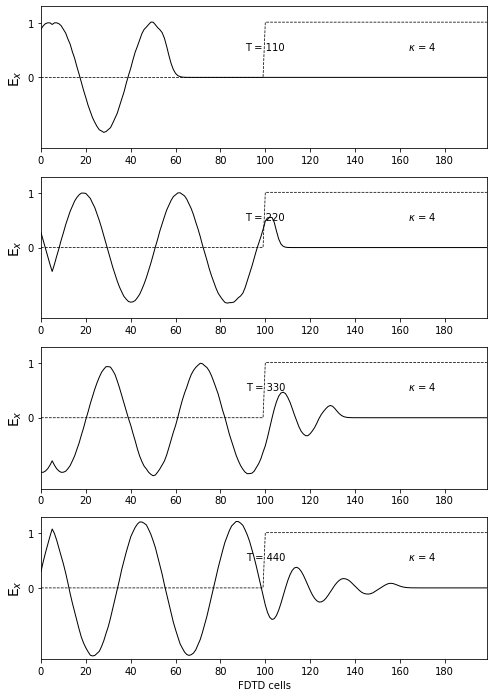

In [11]:
fig = plt.figure(figsize=(8, 12))
for sno, d in enumerate(plotting_data):
  ax = fig.add_subplot(len(plotting_data), 1, sno + 1)
  plot_e_field(d['ex_data'], d['nsteps'], d['label'])